In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
df.shape

(200, 5)

In [85]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df1 = df.drop('CustomerID', axis=1)

In [6]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
#df1['Gender'].value_counts()

In [33]:
from sklearn import preprocessing 


# good when you have three or less unique
le=preprocessing.LabelEncoder()
encgend=le.fit_transform(df1['Gender'])
df1['Genderencoded']=encgend

In [12]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Genderencoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [34]:
df1.drop('Gender',inplace=True,axis=1)

In [17]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Genderencoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [35]:
df1.corr()

,Age,Annual Income (k$),Spending Score (1-100),Genderencoded
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Genderencoded,0.060867,0.056410,-0.058109,1.000000


<AxesSubplot:>

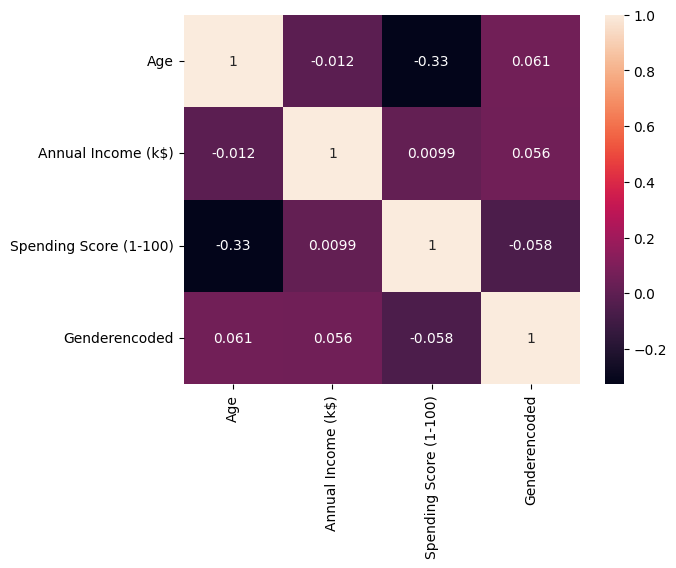

In [63]:
sns.heatmap(df1.corr(),annot=True)

## k-means algorithm

In [36]:
# import the KMeans algorithm
from sklearn.cluster import KMeans


In [29]:
km=KMeans(n_clusters=5,random_state=42)

## Define the X

In [18]:
X=df1

In [37]:
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [38]:
y_pred=km.predict(X)

In [21]:
y_pred

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1])

In [ ]:
km.inertia_

In [ ]:
y_pred

##  Inertia

Inertia is Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

By using the elbow method, you can avoid overfitting (using too many clusters) or underfitting (using too few clusters) in k-means clustering.The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

In [107]:
km.inertia_

97260.47893018977

Text(0.5, 1.0, 'Elbow Method')

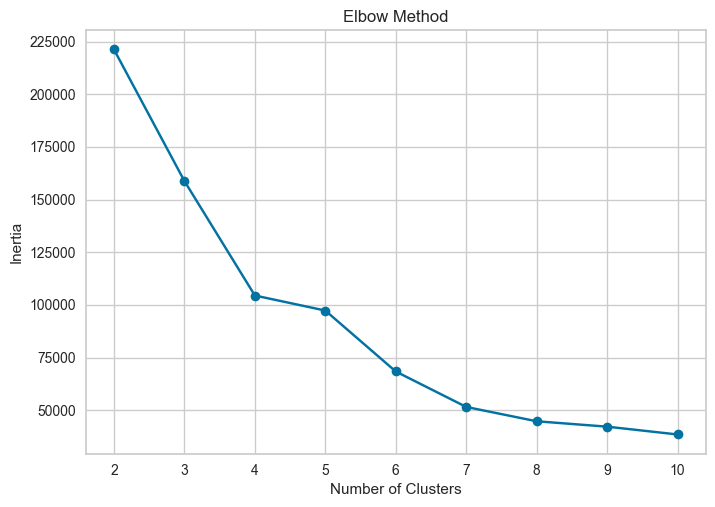

In [45]:
## placeholder to hold my inertia
inertiacontainer=[]

## a for loop statement to loop through the clusters and append the inertia score
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    inertiacontainer.append(model.inertia_)
    

plt.plot(range(2,11),inertiacontainer,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [ ]:
!pip install yellowbrick

In [41]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


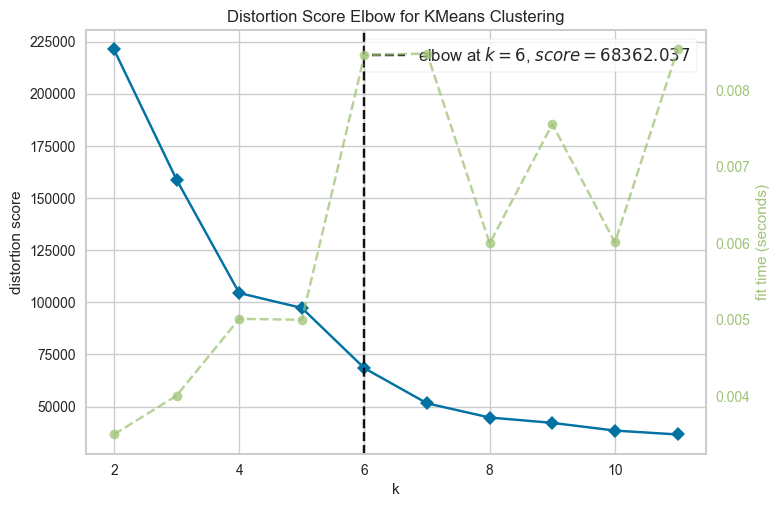

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=11)
Elbow_M.fit(X)
Elbow_M.show()

In [72]:
km=KMeans(n_clusters=5,random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [73]:
y_pred=km.predict(X)

In [74]:
y_pred

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [75]:
df['Clusters']=y_pred

In [81]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
1,2,Male,21,15,81,Spendthrift
43,44,Female,31,39,61,Spendthrift
154,155,Female,47,78,16,Aspirational
104,105,Male,49,62,56,Hustlers
123,124,Male,39,69,91,MiddleClass


In [125]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Clusters'],
      dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

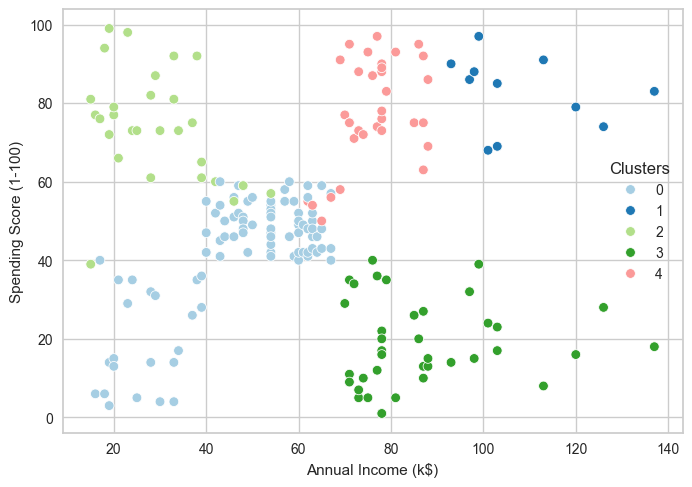

In [77]:

sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Clusters'],palette="Paired")

In [80]:
df['Clusters']=df['Clusters'].replace(0,'Hustlers')
df['Clusters']=df['Clusters'].replace(1,'Affluent')
df['Clusters']=df['Clusters'].replace(2,'Spendthrift')
df['Clusters']=df['Clusters'].replace(3,'Aspirational')
df['Clusters']=df['Clusters'].replace(4,'MiddleClass')

In [ ]:
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')
plt.show()

0: Low Income and Low Spending Score>Hustlers
1: High Income and High Spenders> Wealthy
2:High Income and Low Spending>  Economist 
3:Mid Income and Mid Spending>    MiddleClass
4: Low Income and High Spending>    Spendthrift

In [ ]:
## Replace column Clusters 0,1,2,3,4 with our above definitions

In [ ]:
df['Clusters']=df['Clusters'].replace(0,'Hustlers')
df['Clusters']=df['Clusters'].replace(1,'Affluent')
df['Clusters']=df['Clusters'].replace(2,'Spendthrift')
df['Clusters']=df['Clusters'].replace(3,'Aspirational')
df['Clusters']=df['Clusters'].replace(4,'MiddleClass')

In [124]:
df.to_csv('final_clustersNov.csv')